In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
#Divide the data into x and y (dependent vs independent variable)

In [14]:
#iloc stands for "integer location" indexing and is used in Pandas to 
#select rows and columns by their index numbers 
x = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [16]:
x

array([165349.2 , 162597.7 , 153441.51, 144372.41, 142107.34, 131876.9 ,
       134615.46, 130298.13, 120542.52, 123334.88, 101913.08, 100671.96,
        93863.75,  91992.39, 119943.24, 114523.61,  78013.11,  94657.16,
        91749.16,  86419.7 ,  76253.86,  78389.47,  73994.56,  67532.53,
        77044.01,  64664.71,  75328.87,  72107.6 ,  66051.52,  65605.48,
        61994.48,  61136.38,  63408.86,  55493.95,  46426.07,  46014.02,
        28663.76,  44069.95,  20229.59,  38558.51,  28754.33,  27892.92,
        23640.93,  15505.73,  22177.74,   1000.23,   1315.46,      0.  ,
          542.05,      0.  ])

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [19]:
len(x_train)

40

In [22]:
x_train=x_train.reshape(-1,1)
x_test=x_test.reshape(-1,1)

In [24]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [26]:
x_train

array([[-1.13841561],
       [ 2.00861743],
       [-0.77830243],
       [ 2.07331291],
       [ 0.01979647],
       [-1.33885616],
       [-1.25864599],
       [-0.00298979],
       [-1.79099235],
       [ 1.35067648],
       [-0.26145406],
       [ 0.34276953],
       [-1.44992736],
       [ 0.87826073],
       [-0.04331754],
       [ 1.00569144],
       [-0.11905863],
       [-0.29406185],
       [-0.35684645],
       [-0.72290344],
       [ 1.28628525],
       [-1.14054517],
       [ 0.21745898],
       [-0.22663136],
       [-0.90789184],
       [ 1.58008974],
       [-0.02156843],
       [-0.32359041],
       [-0.37702279],
       [ 0.02864575],
       [ 1.01978219],
       [ 1.52683159],
       [-0.07469091],
       [ 1.0854384 ],
       [-1.15866978],
       [ 1.24916394],
       [ 0.41114477],
       [-0.27194171],
       [-1.29304969],
       [-0.73259189]])

In [28]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred=regressor.predict(x_test)

In [32]:
y_pred

array([133277.143045  , 128012.09341903,  55423.65947978,  56440.95509507,
        55842.84751155,  55423.65947978, 134236.94869021,  98339.25707314,
       174085.85774241, 126564.89903636])

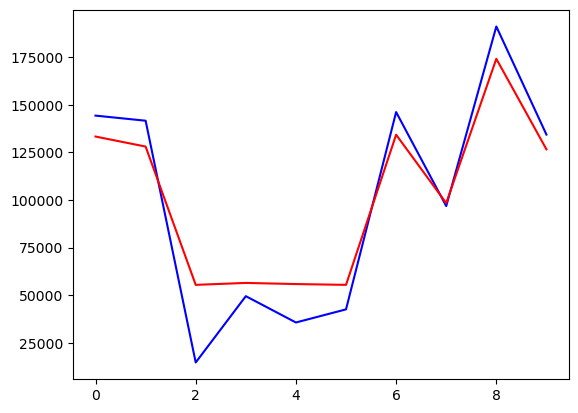

In [34]:
plt.plot(y_test, color='blue', label='Test')
plt.plot(y_pred, color='red', label='Prediction')
plt.show()

In [35]:
# Regression Metrics

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)


14343.383670628906

In [38]:
data=[[131876.41]]
new_df=pd.DataFrame(data)
new_df=sc.transform(new_df)
single=regressor.predict(new_df)
print(single)

[157408.73972035]


###Muliple Linear Regression

In [41]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [43]:
df_dumies=pd.get_dummies(df, drop_first=True)
df_dumies

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False
5,131876.90,99814.71,362861.36,156991.12,False,True
6,134615.46,147198.87,127716.82,156122.51,False,False
7,130298.13,145530.06,323876.68,155752.60,True,False
8,120542.52,148718.95,311613.29,152211.77,False,True
9,123334.88,108679.17,304981.62,149759.96,False,False


In [45]:
## Dividing the data into train and test

x_mlr=df_dumies.drop(['Profit'], axis=1)
y_mlr=df_dumies.Profit

In [47]:
x_mlr

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,False,True
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,True,False
3,144372.41,118671.85,383199.62,False,True
4,142107.34,91391.77,366168.42,True,False
5,131876.90,99814.71,362861.36,False,True
6,134615.46,147198.87,127716.82,False,False
7,130298.13,145530.06,323876.68,True,False
8,120542.52,148718.95,311613.29,False,True
9,123334.88,108679.17,304981.62,False,False


In [49]:
from sklearn.model_selection import train_test_split
x_train_mlr, x_test_mlr, y_train_mlr, y_test_mlr = train_test_split(x_mlr,y_mlr,test_size=0.2)

In [51]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_mlr=sc.fit_transform(x_train_mlr)
x_test_mlr=sc.transform(x_test_mlr)

In [53]:
#create the mlr model
from sklearn.linear_model import LinearRegression

reg2=LinearRegression()
reg2.fit(x_train_mlr, y_train_mlr)

LinearRegression()

In [55]:
y_pred_mlr=reg2.predict(x_test_mlr)

In [57]:
y_pred_mlr

array([114879.95031597,  98412.07874194, 177595.40237137, 133576.77263664,
       171611.0048146 ,  47341.41036005, 112996.08843677, 101775.9859972 ,
        73360.23036957, 126331.70092589])

In [59]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_mlr, y_pred_mlr)


8740.706010749498

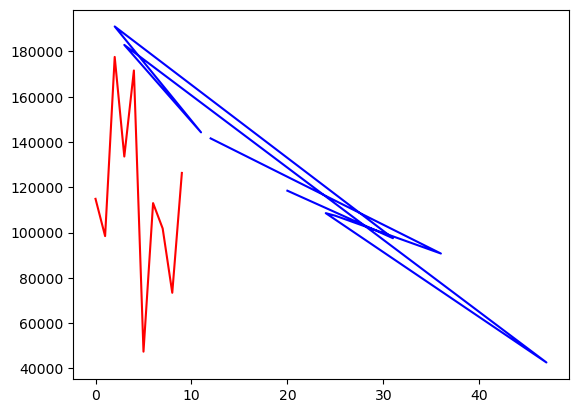

In [61]:
plt.plot(y_test_mlr, color='blue', label='Test')
plt.plot(y_pred_mlr, color='red', label='Prediction')
plt.show()

In [69]:
## correlation
corr_matrics=df_dumies.corr()['Profit']

In [71]:
corr_matrics

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
State_Florida      0.116244
State_New York     0.031368
Name: Profit, dtype: float64

## Multiple Linear Regression - Removing the Unwanted columns

In [76]:
df_dumies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,False,True
1,162597.70,151377.59,443898.53,191792.06,False,False
2,153441.51,101145.55,407934.54,191050.39,True,False
3,144372.41,118671.85,383199.62,182901.99,False,True
4,142107.34,91391.77,366168.42,166187.94,True,False


In [78]:
x_mlr_new=df_dumies.drop(['Profit', 'Administration', 'State_Florida', 'State_New York'], axis=1)
y_mlr_new=df_dumies.Profit

In [80]:
x_mlr_new

,R&D Spend,Marketing Spend
0,165349.20,471784.10
1,162597.70,443898.53
2,153441.51,407934.54
3,144372.41,383199.62
4,142107.34,366168.42
5,131876.90,362861.36
6,134615.46,127716.82
7,130298.13,323876.68
8,120542.52,311613.29
9,123334.88,304981.62


In [82]:
from sklearn.model_selection import train_test_split
x_train_mlr_2, x_test_mlr_2, y_train_mlr_2, y_test_mlr_2 = train_test_split(x_mlr_new,y_mlr_new,test_size=0.2)

In [84]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_mlr_2=sc.fit_transform(x_train_mlr_2)
x_test_mlr_2=sc.transform(x_test_mlr_2)

In [91]:
#create the mlr model
from sklearn.linear_model import LinearRegression

reg3=LinearRegression()
reg3.fit(x_train_mlr_2, y_train_mlr_2)

LinearRegression()

In [97]:
y_pred_mlr_2=reg3.predict(x_test_mlr_2)

In [99]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test_mlr_2, y_pred_mlr_2)

7631.450602367595

In [ ]:
plt.plot(y_test_mlr, color='blue', label='Test')
plt.plot(y_pred_mlr, color='red', label='Prediction')
plt.show()